In [1]:
import matplotlib.pyplot as plt
import pyplotbrookings as ppb
import seaborn as sns

# Brookings plot theme for all plots
ppb.set_theme()

# Getting data
penguins = sns.load_dataset("penguins")

First let's create a histogram plot using base `matplotlib`

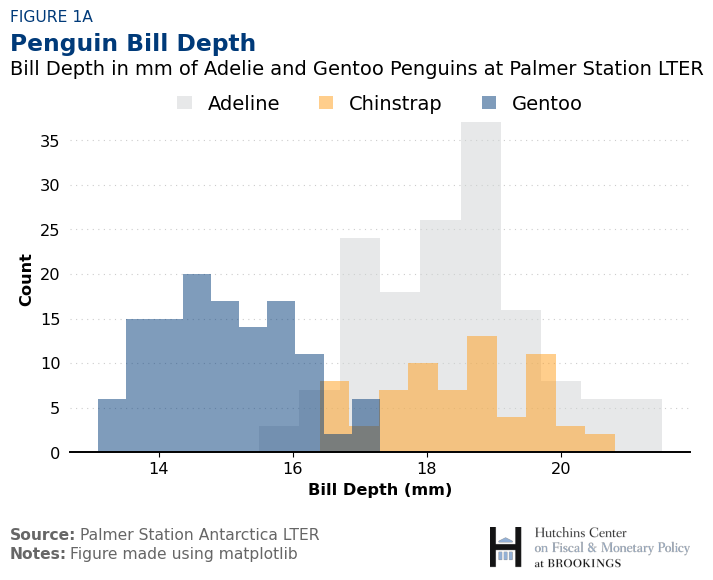

In [2]:
# Setting brand colors for current plot
ppb.set_palette('brand2', reverse=True)

# Plotting histograms
plt.hist(penguins[penguins['species'] == 'Adelie']['bill_depth_mm'], alpha=0.5, label='Adeline')
plt.hist(penguins[penguins['species'] == 'Chinstrap']['bill_depth_mm'], alpha=0.5, label='Chinstrap')
plt.hist(penguins[penguins['species'] == 'Gentoo']['bill_depth_mm'], alpha=0.5, label='Gentoo')
# Adding matplotlib legend/labels
plt.legend(ncol=3)
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Count')

# Adding Brookings titles and logos
ppb.add_title(title='Penguin Bill Depth', 
              subtitle='Bill Depth in mm of Adelie and Gentoo Penguins at Palmer Station LTER', 
              tag='FIGURE 1A', 
              source='Palmer Station Antarctica LTER', 
              notes='Figure made using matplotlib')
# Adding the Hutchins logo
ppb.add_logo('hc')

`pyplotbrookings` also works with `seaborn` for plotting! Let's recreate the above figure again but this time in `seaborn`.

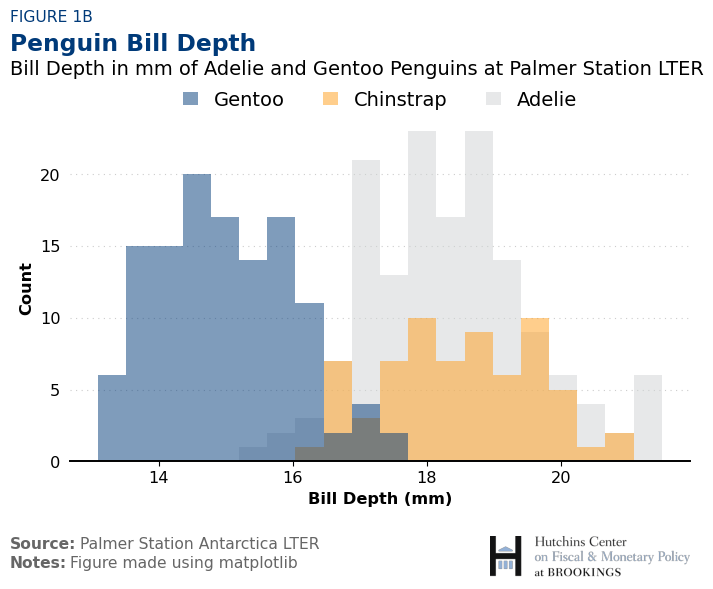

In [3]:
# Reversing data to get the correct z-order ordering of plots
ax = sns.histplot(data=penguins.iloc[::-1], 
                  x='bill_depth_mm', 
                  hue='species', 
                  # Setting the plot palette to Brookings brand2
                  palette=ppb.palettes['brand2'], 
                  bins=20)
# Moving the legend in seaborn to the top
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1.05), ncol=3, title=None, frameon=False)
plt.xlabel('Bill Depth (mm)')

# Adding Brookings titles and logos
ppb.add_title(title='Penguin Bill Depth', 
              subtitle='Bill Depth in mm of Adelie and Gentoo Penguins at Palmer Station LTER', 
              tag='FIGURE 1B', 
              source='Palmer Station Antarctica LTER', 
              notes='Figure made using matplotlib',
              title_pad=2)
ppb.add_logo('hc')

`pyplotbrookings` can be used to make many different plots. Let's create one with a colormap!

/Users/adamsedlak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  # This is added back by InteractiveShellApp.init_path()


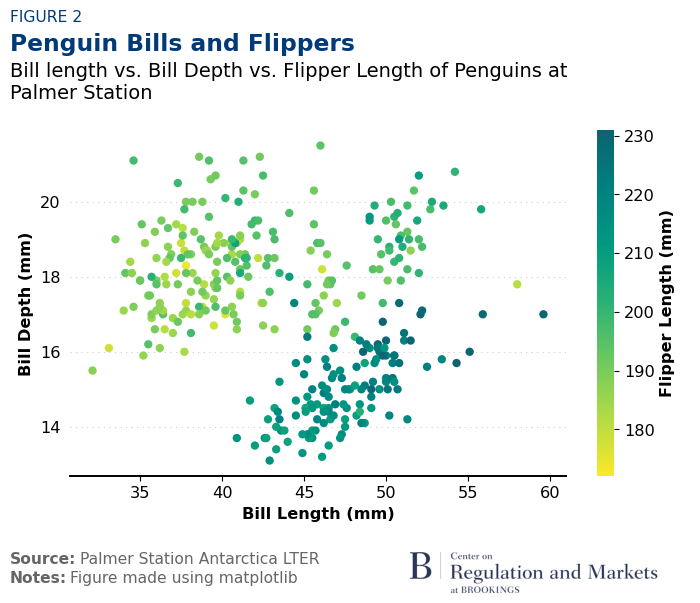

In [4]:
# Getting the Brookings sequential2 color map
cmap = ppb.get_cmap('sequential2', reverse=True)
# Creating a scatter plot
plt.scatter(data=penguins, x='bill_length_mm', y='bill_depth_mm', c='flipper_length_mm', cmap=cmap)

# Adding matplotlib legend/labels
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')

# Adding color bar (as far as I can tell the deprecation warning is a bug in matplotlib)
cbar = plt.colorbar(cmap=cmap)
cbar.set_label('Flipper Length (mm)')
cbar.outline.set_visible(False)

# Adding Brookings titles and logos
# NOTE: Here our subtitle is too long but pyplotbrookings
#       will auto parse linefeeds (\n) in subtitles and add
#       extra space as needed.
ppb.add_title(title='Penguin Bills and Flippers', 
              subtitle='Bill length vs. Bill Depth vs. Flipper Length of Penguins at\nPalmer Station', 
              tag='FIGURE 2', 
              source='Palmer Station Antarctica LTER', 
              notes='Figure made using matplotlib')
# Adding a CRM logo
ppb.add_logo('crm', scale=0.35, offsets=(-0.1, 0))

Brand guidelines recommend using Roboto font. `pyplotbrookings` comes with Roboto fonts which can be imported

In [5]:
# Importing Roboto font
ppb.import_roboto()

Now we can create a new figure using the Roboto font

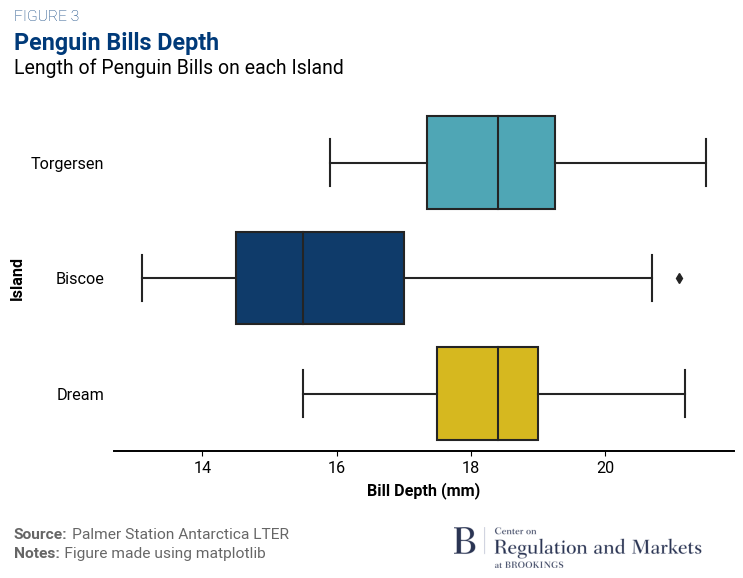

In [6]:
# Creating a boxplot
sns.boxplot(data=penguins, x='bill_depth_mm', y='island', palette=ppb.palettes['misc'])

# Adding Brookings titles and logos
ppb.add_title(title='Penguin Bills Depth', 
              subtitle='Length of Penguin Bills on each Island', 
              tag='FIGURE 3', 
              source='Palmer Station Antarctica LTER', 
              notes='Figure made using matplotlib',
              # NOTE: Becase the y labels are long we need to add additional offsets in the
              #       x direction to the titles and sources/notes so that the align with the
              #       y label.
              x_offset=-0.05)

# Adding matplotlib legend/labels
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Island')

ppb.add_logo('crm', scale=0.35, offsets=(-0.1, 0))

You can also preview a palette using `view_palette()`! The numbers indicate the palette order and text color is adherent to W3C guidelines (in case you need to place black or white text on top of any palette colors). Lets look at the first four color palettes in the base palette `palettes`). 

NOTE: Here we are directly accessing the palettes dictionaries (`palettes` and `extended_palettes`) but **only** for lookup and **not** assignment. 

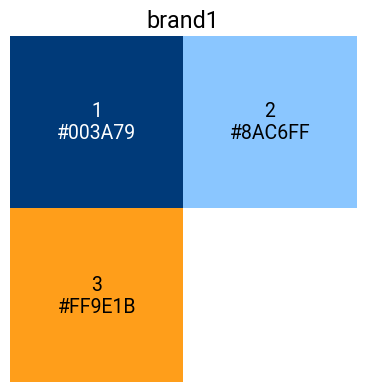

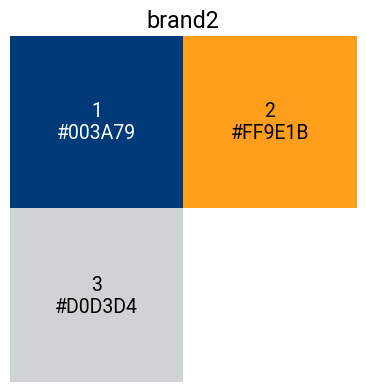

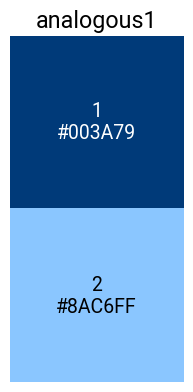

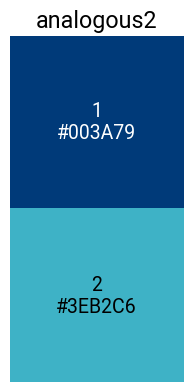

In [7]:
# Preview color palettes and the correct text color (black or white) that can be applied on top of each color
for p in list(ppb.palettes.keys())[:4]:
    plt.title(p)
    ppb.view_palette(p)

We can also preview some of the extended Brookings palettes in `extended_palettes`.

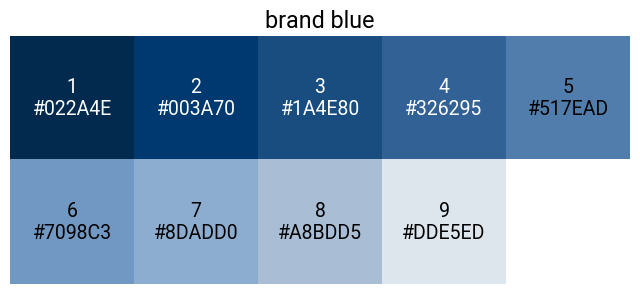

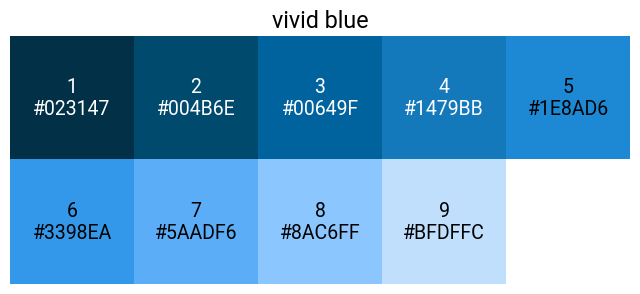

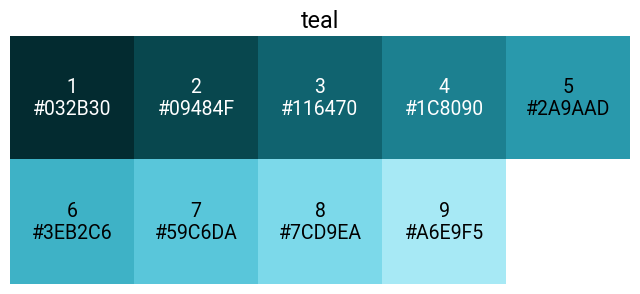

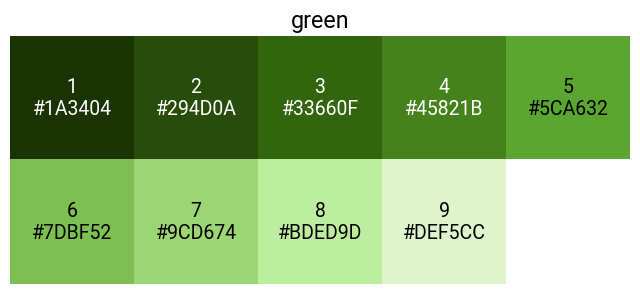

In [8]:
for p in list(ppb.extended_palettes.keys())[:4]:
    plt.title(p)
    ppb.view_palette(p)